In [1]:
import MDAnalysis
import numpy as np
from DEERpredict.DEER import DEERpredict
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import minimize_scalar, least_squares

Example of how to run DEERpredict to calculate $P(r)$ and PRE rates for PDB 1NTI (one conformations, 46 rotamers per nitroxide probe)

In [2]:
u = MDAnalysis.Universe('HIV-1PR.pdb')

In [3]:
DEER = DEERpredict(u, residues = [55, 55], chains=['A', 'B'], output_prefix = 'res', weights = False,
      load_file = False, log_file = 'log', temperature = 298 )
DEER.run()

In [4]:
x, y, _ = np.loadtxt('res-55-55.dat',unpack=True)
x_ref, y_ref = np.loadtxt('DEER_HIV-1PR.dat',unpack=True)

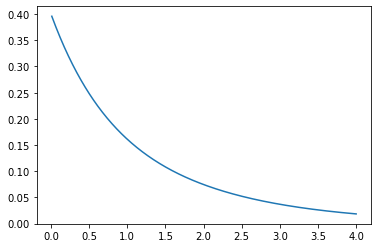

In [6]:
x, y = np.loadtxt('res-55-55_time-domain.dat',unpack=True)
plt.plot(x,y)

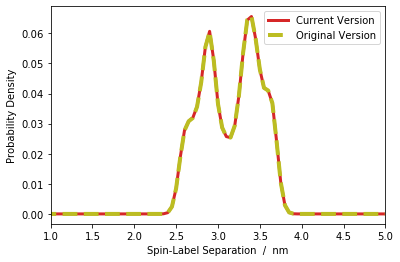

In [11]:
plt.plot(x[100:401],y[200:501],color=plt.cm.tab10(3),lw=3,label=r'Current Version')
plt.plot(x_ref,y_ref,color=plt.cm.tab10(8),ls='--',label=r'Original Version',lw=4)
plt.xlim(1,5)
plt.ylabel('Probability Density')
plt.xlabel('Spin-Label Separation  /  nm')
plt.legend()
plt.savefig('DEER.pdf')

In [18]:
t = np.ones(12)
r = np.ones(10)
print(t.shape,r.shape)

(12,) (10,)


In [19]:
(t.reshape(-1,1)*r).shape

(12, 10)